### Now, let's dive deeper into analyzing LinearLogistic using the Breast Cancer dataset.

In [34]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [35]:
# load data
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train model
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [36]:
# predict
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
# print Model accuracy
print(f"Training test set: {logreg.score(X_train, y_train):.3f}")
print(f"Testing test set: {logreg.score(X_test, y_test):.3f}")

Training test set: 0.963
Testing test set: 0.956


The default value of C=1 provides quite good performance, with 95% accuracy on both the training and the test set. But as training and test set performance are very close, it is likely that we are underfitting. 

Let’s try to increase C to fit a more flexible model:

In [37]:
logreg100 = LogisticRegression(C=100, max_iter=10000)
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, max_iter=10000)

In [38]:
print(f"Training test set: {logreg100.score(X_train, y_train):.3f}")
print(f"Testing test set: {logreg100.score(X_test, y_test):.3f}")

Training test set: 0.985
Testing test set: 0.956


Using C=100 results in higher training set accuracy, and also a slightly increased test set accuracy, confirming our intuition that a more complex model should perform better. We can also investigate what happens if we use an even more regularized model than the default of C=1, by setting C=0.01:

In [44]:
logreg001 = LogisticRegression(C=0.001, max_iter=10000)
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.001, max_iter=10000)

In [45]:
print(f"Training test set: {logreg001.score(X_train, y_train):.3f}")
print(f"Testing test set: {logreg001.score(X_test, y_test):.3f}")

Training test set: 0.938
Testing test set: 0.965


As anticipated, when moving further left on the scale in the figure, starting from an underfit model, both the training and test set accuracies decrease compared to the default parameters. Finally, let's examine the coefficients learned by the models using the three different settings of the regularization parameter C:

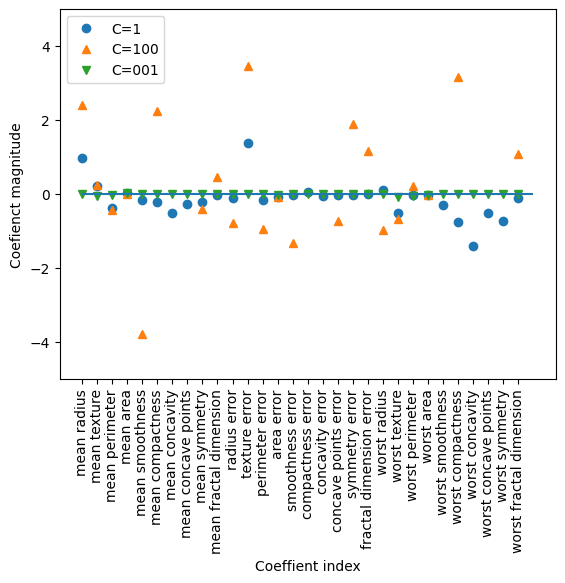

In [46]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=001')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coeffient index")
plt.ylabel("Coefienct magnitude")
plt.legend()
plt.show()

If we desire a more interpretable model, using L1 regularization might help, as it limits the model to using only a few features. Here is the coefficient plot and classification accuracies for L1 regularization

c:\Users\Dr Munyai\Developer\Python Projects\Machine Learning 700\Machine-Learning-700\Assignment\.venv\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Dr Munyai\Developer\Python Projects\Machine Learning 700\Machine-Learning-700\Assignment\.venv\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Training accuracy of L1 logreg with C=0.00
Test accuracy of l1 logreg with C=0.00
Training accuracy of L1 logreg with C=1.00
Test accuracy of l1 logreg with C=1.00
Training accuracy of L1 logreg with C=100.00
Test accuracy of l1 logreg with C=100.00


c:\Users\Dr Munyai\Developer\Python Projects\Machine Learning 700\Machine-Learning-700\Assignment\.venv\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


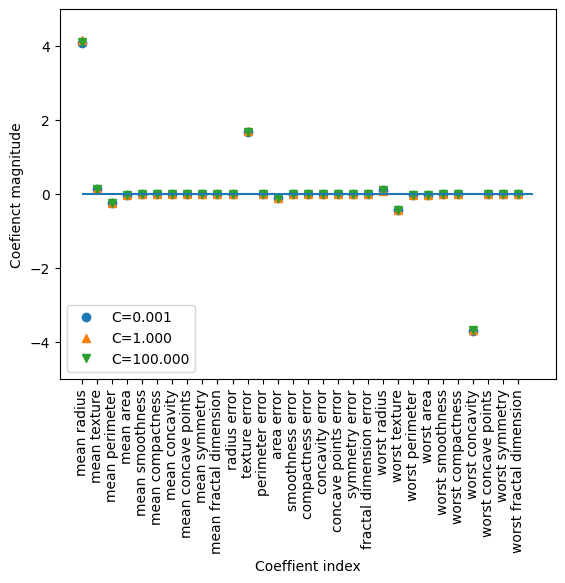

In [60]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=1, penalty='l1', solver='liblinear').fit(X_train, y_train)
    print("Training accuracy of L1 logreg with C={:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label='C={:.3f}'.format(C))
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coeffient index")
plt.ylabel("Coefienct magnitude")
plt.legend(loc=3)
plt.show()